# TASK 1

### Import Libraries

In [1]:
# Import Essential Libraries

# Data Manipulation and Analysis
import pandas as pd  # Used for handling the dataset (DataFrames), cleaning, and processing
import numpy as np   # Used for numerical operations and array handling

# Data Visualization
import matplotlib.pyplot as plt  # Core plotting library for creating static graphs
import seaborn as sns            # Advanced visualization library based on matplotlib (makes graphs look better)

# Machine Learning - Preprocessing
# train_test_split: Splits data into training (80%) and testing (20%) sets
# GridSearchCV: Used for Hyperparameter Tuning (finding best settings for Decision Tree)
from sklearn.model_selection import train_test_split, GridSearchCV

# StandardScaler: Normalizes numerical data (scales features to mean=0, var=1) for Neural Networks
# LabelEncoder: Encodes categorical text labels into numbers (if needed)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Decision Tree Model
from sklearn.tree import DecisionTreeClassifier # The traditional ML algorithm we are comparing against

# Machine Learning - Evaluation Metrics
# These metrics allow us to assess model performance beyond just 'Accuracy'
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Deep Learning (Neural Networks)
import tensorflow as tf       # The core Deep Learning framework
from tensorflow import keras  # High-level API for building Neural Networks easily
from tensorflow.keras import layers # Used to create layers like Dense (neurons) and Dropout

# ==========================================
# 2. Configuration
# ==========================================
# Set the aesthetic style of the plots to 'whitegrid' for better readability
sns.set(style="whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


### Load Dataset

In [2]:
# ==========================================
# 2. Load the Dataset
# ==========================================

# We use a try-except block to handle potential file not found errors gracefully.
# This ensures the user is informed if they forgot to upload the CSV file.
try:
    # pd.read_csv: Reads the comma-separated values (CSV) file into a Pandas DataFrame.
    # The string inside is the specific filename of the Telco Churn dataset.
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    
    # Confirmation message if loading is successful
    print("Dataset loaded successfully.")

except FileNotFoundError:
    # This block executes only if Python cannot find the file specified above.
    print("Error: File not found.")
    print("Please upload 'WA_Fn-UseC_-Telco-Customer-Churn.csv' to the Colab files area.")

Dataset loaded successfully.


### Count Blank Spaces in TotalCharges

In [3]:
# ==========================================
# 3. Data Cleaning: Check for Invisible Missing Values
# ==========================================

# Standard .isnull() often misses empty strings (" ") in object columns.
# We manually check the 'TotalCharges' column for these hidden missing values.

if 'TotalCharges' in df.columns:
    # 1. Identify rows with blank spaces
    # We convert the column to string, strip whitespace, and check if it becomes empty ''.
    # This catches " ", "  ", etc., which are common errors in CSVs.
    blank_mask = df['TotalCharges'].astype(str).str.strip() == ''
    
    # 2. Count the missing values
    num_blank = int(blank_mask.sum())
    total_rows = len(df)
    
    # 3. Calculate Percentage
    # (Avoid division by zero error if df is empty)
    pct_blank = (num_blank / total_rows * 100) if total_rows else 0
    
    # 4. Report Findings
    print(f"Missing (Blank) entries in 'TotalCharges': {num_blank} out of {total_rows} ({pct_blank:.2f}%)")
    
    # 5. Visual Inspection
    # If blanks exist, show the first 5 examples to confirm they are empty.
    if num_blank > 0:
        print("Sample rows with blank TotalCharges:")
        display(df.loc[blank_mask].head())

else:
    # Error handling if the column name doesn't match
    print("Column 'TotalCharges' not found. Please check column names.")

Missing (Blank) entries in 'TotalCharges': 11 out of 7043 (0.16%)
Sample rows with blank TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


### Handle Missing Values in TotalCharges

In [4]:
# ==========================================
# 4. Correcting Data Types and Filling Missing Values
# ==========================================

# 1. Convert 'TotalCharges' to Numeric
# The 'TotalCharges' column was imported as 'Object' (string) because of the blank spaces.
# pd.to_numeric attempts to convert the column to numbers.
# errors='coerce': If it encounters a value it can't convert (like " "), it turns it into NaN (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Impute Missing Values
# The blank charges usually correspond to new customers (Tenure = 0) who haven't been billed yet.
# Therefore, it is logical to replace these NaN values with 0.
# inplace=True: Modifies the dataframe directly without creating a new copy.
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36208\1645279452.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


### Remove Customer ID & Churn Convertion

In [5]:
df.drop(columns=['customerID'], inplace=True)

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
print("Data cleaning complete.")
print(f"Dataset Shape: {df.shape}")
df.head()

Data cleaning complete.
Dataset Shape: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Export Cleaned CSV

In [7]:
# Export cleaned dataset to CSV
output_csv = 'WA_Fn-UseC_-Telco-Customer-Churn_cleaned.csv'
df.to_csv(output_csv, index=False)
print(f"Cleaned dataset exported to: {output_csv} (rows: {df.shape[0]}, columns: {df.shape[1]})")

# Show first rows to confirm export
df.head()

Cleaned dataset exported to: WA_Fn-UseC_-Telco-Customer-Churn_cleaned.csv (rows: 7043, columns: 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Exploratory Data Analysis (EDA)

### Target Distribution (Class Imbalance)

C:\Users\User\AppData\Local\Temp\ipykernel_36208\3400575638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


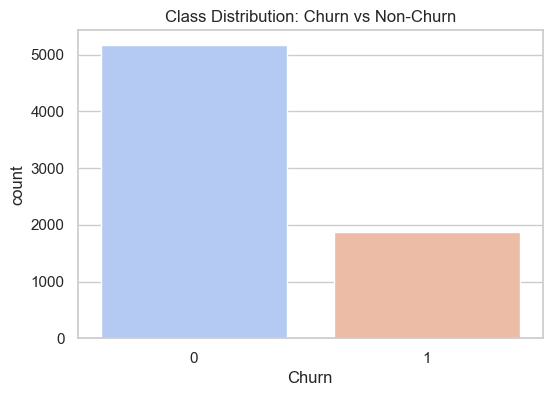

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Class Distribution: Churn vs Non-Churn')
plt.show()

### Numerical Features Distribution

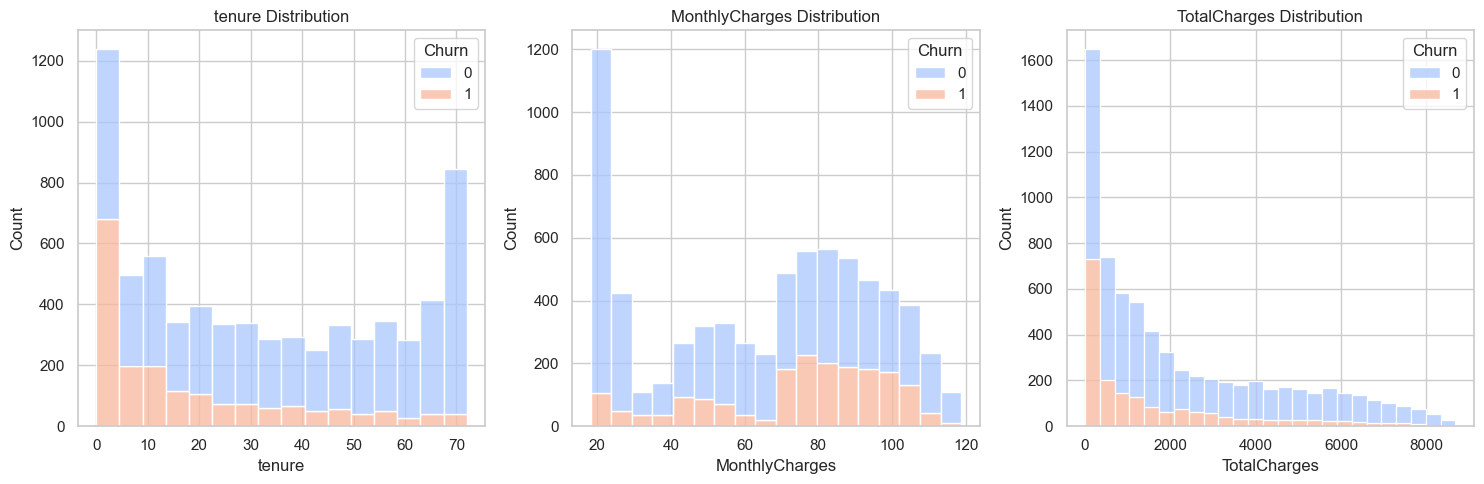

In [9]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df, x=col, hue='Churn', multiple="stack", palette='coolwarm')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

### Categorical Correlations (e.g., Contract Type)

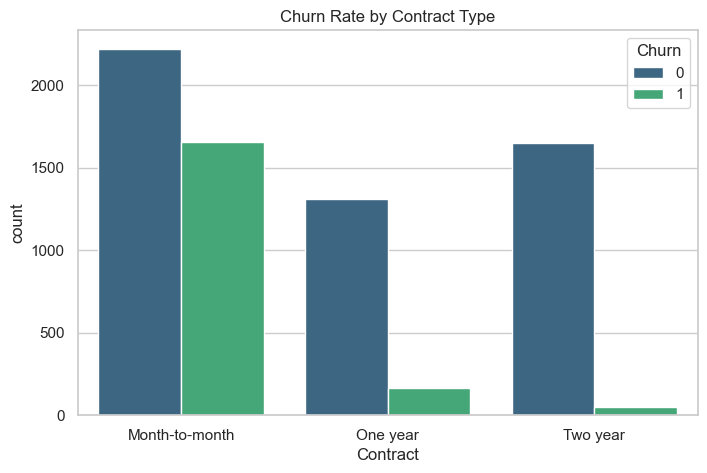

EDA Insight: 'Month-to-month' contracts have a significantly higher churn rate.


In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.show()

print("EDA Insight: 'Month-to-month' contracts have a significantly higher churn rate.")

### Correlation Matrix Heatmap

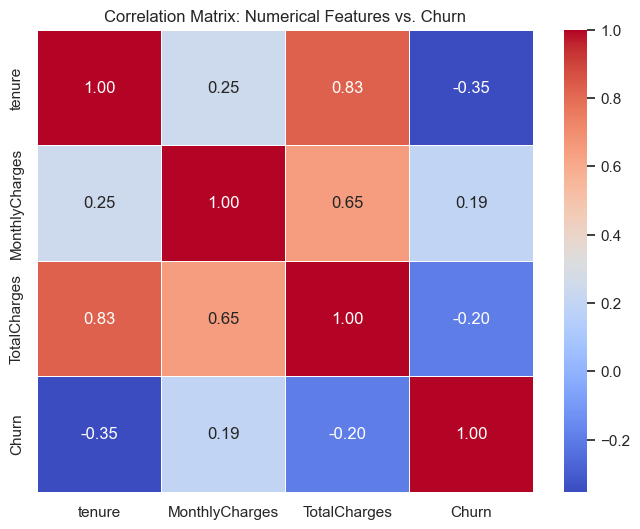

In [11]:
# Select numerical columns + Target
# Use the original 'df' but select only numbers to avoid errors
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df[num_cols].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Numerical Features vs. Churn')
plt.show()

## Data PreProcessing

### Encoding

In [12]:
# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("Encoding complete.")

Encoding complete.


### Check Columns 

In [13]:
print(f"Columns BEFORE Encoding: {df.shape[1]}")
print(f"Columns AFTER Encoding:  {df_encoded.shape[1]}")

# Calculate how many new columns were added
diff = df_encoded.shape[1] - df.shape[1]
print(f"New columns added: {diff}")

# show all columns
pd.set_option('display.max_columns', None)

df_encoded.head()

Columns BEFORE Encoding: 20
Columns AFTER Encoding:  31
New columns added: 11


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


### Splitting and Scaling

In [14]:
# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Splitting and Scaling complete.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Splitting and Scaling complete.
Training set shape: (5634, 30)
Testing set shape: (1409, 30)


# TASK 2

## Decision Tree

### Implementation

In [15]:
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Run Grid Search (5-Fold Cross Validation)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Store the best model
best_dt = grid_search.best_estimator_

print(f"Decision tree parameters (best): {grid_search.best_params_}")
print("Decision Tree Training Complete.")

Decision tree parameters (best): {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Decision Tree Training Complete.


### Model Evaluation


--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.67      0.39      0.49       374

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409

ROC-AUC Score: 0.8168


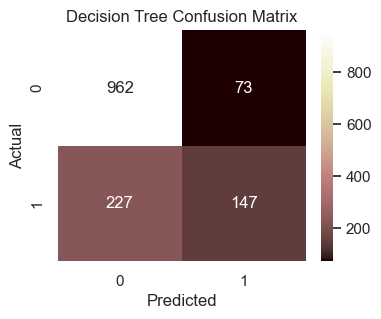

In [16]:
# Predict on Test Data
y_pred_dt = best_dt.predict(X_test_scaled)
y_prob_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

# Classification Report & ROC-AUC
print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_dt):.4f}")

# Confusion Matrix Visualization
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='pink')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Neural Network

### Model Construct and Training

In [17]:
# Hyperparameters
EPOCHS = 50
BATCH_SIZE = 32

# Build the model (Sequential API)
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Input Layer
    layers.Dropout(0.2), # Dropout to prevent overfitting
    layers.Dense(16, activation='relu'), # Hidden Layer
    layers.Dense(1, activation='sigmoid') # Output Layer (Sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks (Early Stopping & Model Checkpoint)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=0),
    ModelCheckpoint('best_nn_model.keras', monitor='val_loss', save_best_only=True, verbose=0)
]

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks
)

print("Neural Network Training Complete.")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7522 - loss: 0.4917 - val_accuracy: 0.7808 - val_loss: 0.4505 - learning_rate: 0.0010
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7921 - loss: 0.4398 - val_accuracy: 0.7791 - val_loss: 0.4423 - learning_rate: 0.0010
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.4254 - val_accuracy: 0.7799 - val_loss: 0.4392 - learning_rate: 0.0010
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.4170 - val_accuracy: 0.7853 - val_loss: 0.4373 - learning_rate: 0.0010
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4167 - val_accuracy: 0.7835 - val_loss: 0.4377 - learning_rate: 0.0010
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8081 - loss: 0.4090 - val_accuracy: 0.7870 - val_loss: 0.4366 - learning_rate: 0.0010
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8023 - loss: 0.4141 - 

### Training & Validation Curves (Loss & Accuracy)

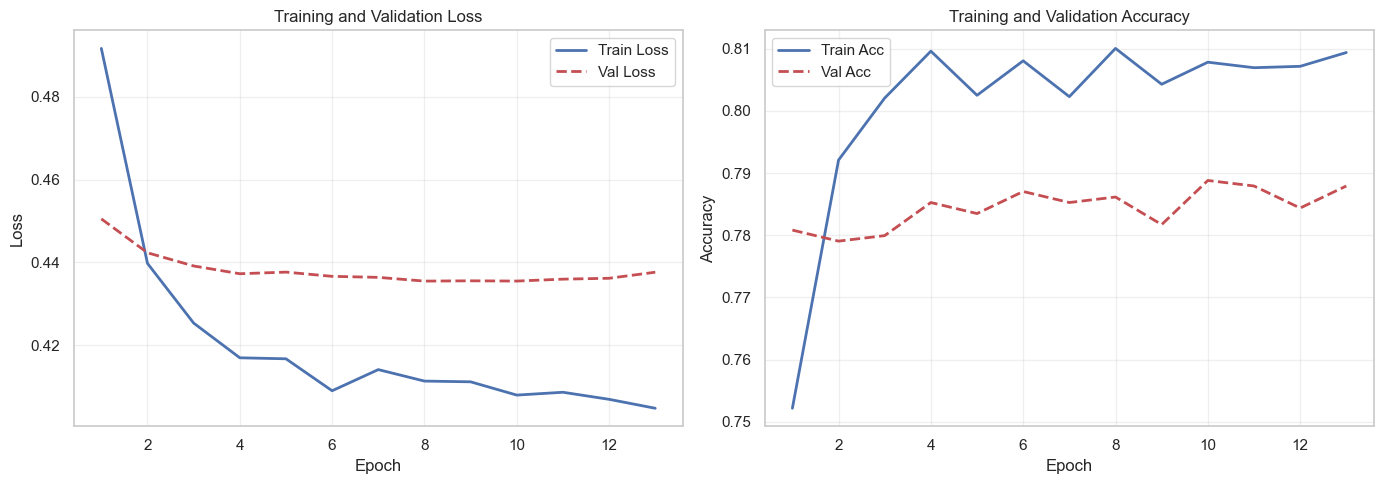

Training curves saved to: nn_training_curves.png


In [20]:
# Plot and save clear training & validation loss and accuracy curves

if 'history' not in globals():
    print("No training history found. Run the Neural Network training cell first to generate `history`.")
else:
    hist = history.history
    epochs = range(1, len(hist.get('loss', [])) + 1)
    plt.figure(figsize=(14, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, hist.get('loss', []), 'b-', linewidth=2, label='Train Loss')
    plt.plot(epochs, hist.get('val_loss', []), 'r--', linewidth=2, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(alpha=0.3)
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in hist else 'acc'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in hist else 'val_acc'
    plt.plot(epochs, hist.get(acc_key, []), 'b-', linewidth=2, label='Train Acc')
    plt.plot(epochs, hist.get(val_acc_key, []), 'r--', linewidth=2, label='Val Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    out_file = 'nn_training_curves.png'
    
    plt.savefig(out_file, dpi=150)
    plt.show()

    print(f"Training curves saved to: {out_file}")

In [24]:
# Make predictions on test data
y_prob_nn = model.predict(X_test_scaled).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

print("Neural Network Predictions Complete.")
print(f"Predictions shape: {y_pred_nn.shape}")
print(f"Sample predictions (first 10): {y_pred_nn[:10]}")
print(f"Sample probabilities (first 10): {y_prob_nn[:10]}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Predictions Complete.
Predictions shape: (1409,)
Sample predictions (first 10): [0 1 0 0 0 1 0 0 0 1]
Sample probabilities (first 10): [0.05670141 0.68055415 0.09065745 0.35941055 0.02786794 0.64148766
 0.3686156  0.10048862 0.00345601 0.5415081 ]


### Model Evaluation

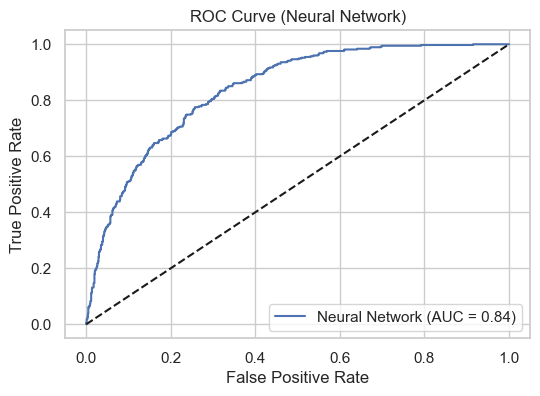

In [25]:
# ROC Curve Visualization
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_score(y_test, y_prob_nn):.2f})")
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Neural Network)')
plt.legend()
plt.show()

### Final Evaluation & Comparison

--- Neural Network Results ---
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.58      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC Score: 0.8391


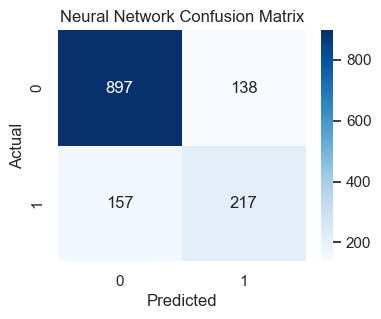

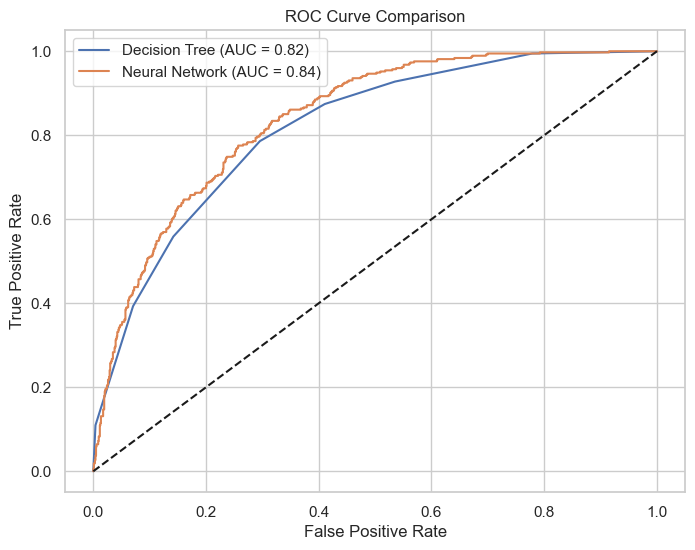

In [28]:
# 2. Evaluate Neural Network
# Note: Ensure you have run the Neural Network block first so y_pred_nn exists
evaluate_model(y_test, y_pred_nn, y_prob_nn, "Neural Network")

# 3. ROC Curve Comparison Plot
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_score(y_test, y_prob_nn):.2f})")
plt.plot([0, 1], [0, 1], 'k--') # Diagonal random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()